In [1]:
#importing all necessary libraries
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"labels", "v2":"text"})

In [4]:
data.tail()

,labels,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data['label'] = data['labels'].map({'spam':1, 'ham':0})


In [6]:
data.head()

,labels,text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3)

In [8]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(1672,)
(3900,)
(1672,)
(3900,)


In [9]:
#for test transformation
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vector = CountVectorizer()
vector.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
X_train_df = vector.transform(X_train)
X_test_df = vector.transform(X_test)


In [12]:
ham_words = ''
spam_words = ''

spam = data[data['label']==1]
ham = data[data['label']==0]

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
for sentence in spam['text']:
    text = sentence.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words +' '

for sentence in ham['text']:
    text = sentence.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words+' '

In [15]:
#generating word_cloud and visualize

spam_wordCloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordCloud = WordCloud(width=600, height=400).generate(ham_words)


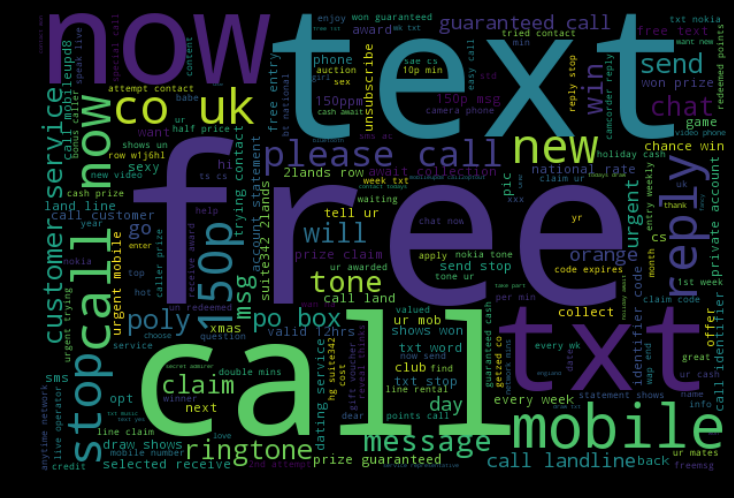

In [16]:
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordCloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

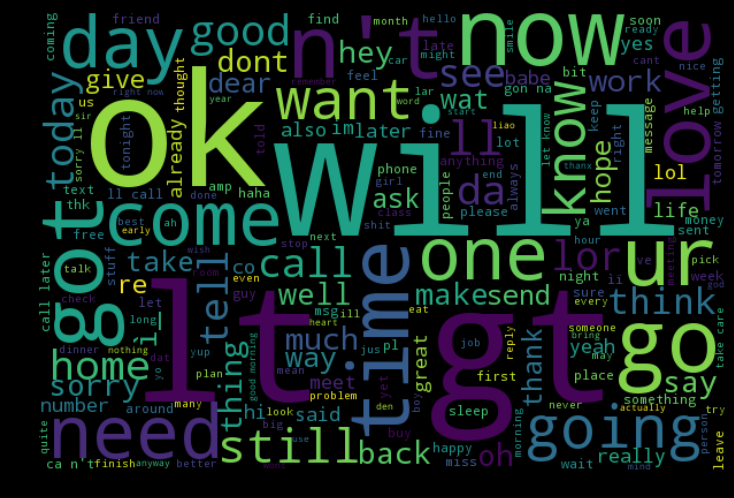

In [17]:
plt.figure(figsize=(10,8), facecolor='k')
plt.axis('off')
plt.imshow(ham_wordCloud)
plt.tight_layout(pad=0)
plt.show()

In [18]:
#as we have descrete features of 0 and 1
# we can use naive bayes(multinomial) as its the best choice

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
prediction = dict()
prediction['Multinomial'] = model.predict(X_test_df)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, prediction['Multinomial'])

0.9814593301435407

In [20]:
X_test[y_test<prediction['Multinomial']]

215     Finally the match heading towards draw as your...
4620                   Received, understood n acted upon!
4700                               I liked the new mobile
573                                Waiting for your call.
1259    We have sent JD for Customer Service cum Accou...
1081                    Can u get pic msgs to your phone?
4598              Have you laid your airtel line to rest?
990                                          26th OF JULY
4727    I (Career Tel) have added u as a contact on IN...
Name: text, dtype: object

These are the texts which are wrongly classified as spam!!

In [21]:
l1 = len(X_test[y_test<prediction['Multinomial']])
print(l1)

9
